<a href="https://colab.research.google.com/github/victorviro/Deep_learning_python/blob/master/Keras_pretained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictions with pre-trained models in Keras

In previous notebooks, we saw an [introduction to CNNs](https://github.com/victorviro/Deep_learning_python/blob/master/Introduction_to_CNNs.ipynb) and some classical [architectures of CNNs](https://github.com/victorviro/Deep_learning_python/blob/master/CNN_Architectures.ipynb) for classification tasks.

Keras offers deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

In this notebook, we load a model Resnet-50 pre-trained on the imagenet dataset for prediction. Note that we could use other models like VGG19, inception, densenet, etc (see [Keras-applications](https://keras.io/api/applications/)).

We load the image.

In [1]:
import requests
from matplotlib.image import imread
image_url = 'https://raw.githubusercontent.com/victorviro/Deep_learning_python/master/resources/african_elephant.jpg'
response = requests.get(image_url, stream=True)
image = imread(response.raw, format='jpg')
print(image.shape)

(1280, 1920, 3)


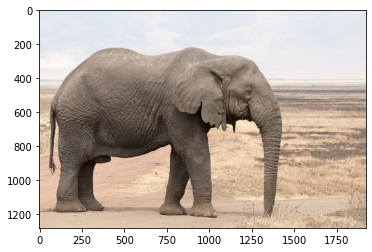

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image)

The image contains an african elephant.

Pretrained models assume that the images are preprocessed in a specific way. Each model provides a function to preprocess the images. These functions assume pixel values range from 0 to 255.

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.image import resize
import numpy as np

x = np.expand_dims(image, axis=0)
print(x.shape)

# Resnet50 expects 224 x 224 images
x = resize(x, [224,224])
print(x.shape)
x = preprocess_input(x)

(1, 1280, 1920, 3)
(1, 224, 224, 3)


We create a Resnet50 model. Weights are downloaded automatically when instantiating the model.

In [4]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 3s 0us/step


We use the pre-trained model to make predictions.

In [5]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.7491483), ('n01871265', 'tusker', 0.15268078), ('n02504013', 'Indian_elephant', 0.08985858)]


In [6]:
# display the top K predictions with class name and estimated probability

for class_id, name, y_proba in decode_predictions(preds, top=3)[0]:
    print(name, y_proba*100)

African_elephant 74.91483092308044
tusker 15.268078446388245
Indian_elephant 8.985857665538788


The model predicts the correct class with a probability near to 75%.

# References

- [Keras-applications](https://keras.io/api/applications/)